   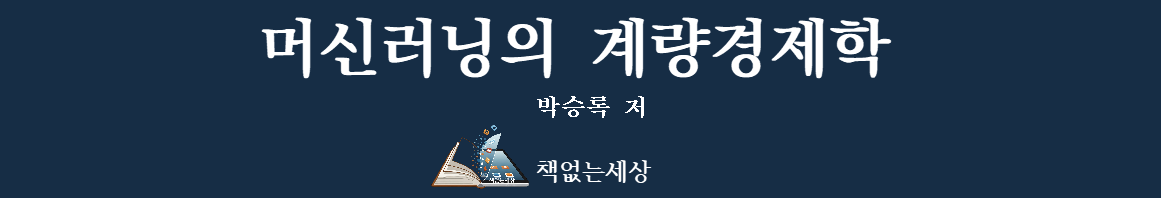

# Part 2: 파이썬 생태계(Python's Ecosystem) 구축

In [1]:
# 연습: 계량경제학 예제로 많이 쓰이는 Wooldridge의 데이터세트 설치
!pip install wooldridge   

In [2]:
# 나의 Python Ecosystem에 어떤 Libraries가 설치되어 있는지 확인
!conda list

# packages in environment at C:\Users\PARKSeungRok\anaconda3:
#
# Name                           Version              Build               Channel
_anaconda_depends                2025.06              py313_mkl_2
aiobotocore                      2.19.0               py313haa95532_0
aiohappyeyeballs                 2.4.4                py313haa95532_0
aiohttp                          3.11.10              py313h827c3e9_0
aioitertools                     0.7.1                pyhd3eb1b0_0
aiosignal                        1.2.0                pyhd3eb1b0_0
alabaster                        0.7.16               py313haa95532_0
altair                           5.5.0                py313haa95532_0
anaconda-anon-usage              0.7.1                py313hfc23b7f_100
anaconda-auth                    0.8.6                py313haa95532_0
anaconda-catalogs                0.2.0                py313haa95532_2
anaconda-cli-base                0.5.2                py313haa95532_0
anaconda-client       

## 현재 작업공간(Present Working Directory) 확인 및 바꾸기

In [3]:
# 작업공간(working directory)지정  
import os  
os.chdir("X:\Econometrics_with_ML")

# 현재 작업공간(working directory)확인  
os.getcwd() 

'X:\\Econometrics_with_ML'

## 필요한 라이브러리(모듈) 불러오기

In [4]:
# 매번 필요한 라이브러리를 설치하면 최근 버전으로 업데이트 되면서 기존 코드에 에러(Error) 발생 가능성이 있어서 특별한 경우 선별적으로 설치
# !pip install numpy pandas scipy math patsy matplotlib seaborn stargazer statsmodels linearmodels arch wooldridge wbdata warnings random scikit-learn pmdarima wbdata imfpy lazypredict joblib pickle pycaret 

In [5]:
!pip install stargazer

In [6]:
!pip install linearmodels

In [7]:
!pip install wbdata

In [8]:
!pip install arch

In [9]:
# 전통적 계량경제학에서 자주 사용되는 라이브러리(Libraries for the Analysis of Traditional Econometrics)
# Call this file 
# "exec(open('Functions/Traditional_Econometrics_Lib.py').read())"
# "%run –i Functions/Traditional_Econometrics_Lib.py"
# "from Functions.Traditional_Econometrics_Lib import * "

import os
import numpy as np                                       # Numerical calculations
import pandas as pd                                      # Data handling
import math as someAlias
import matplotlib.dates as mdates                        # Turn dates into numbers
import matplotlib.pyplot as plt                          # Lower-level graphics
import patsy as pt
import seaborn as sns
import stargazer as sg
import statsmodels.api as sm
import statsmodels.formula.api as smf                    # Econometrics
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as dg
import statsmodels.stats.outliers_influence as smo
import linearmodels as lm                                # Panel model, Simultaneous Eq. Model
import scipy.stats as stats                              # Statistics
import random

from scipy.optimize import Bounds
from scipy.optimize import curve_fit                    # Nonlinear regression
from scipy.optimize import minimize
from scipy.stats import norm
from statsmodels.graphics import tsaplots               # Time series
from statsmodels.iolib.summary2 import summary_col
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.api import VAR
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller          # ADF test
from statsmodels.tsa.stattools import coint             # Cointegration
from statsmodels.tsa.vector_ar.vecm import VECM
from arch import arch_model

import wooldridge as woo
import wbdata


import warnings
warnings.filterwarnings("ignore")

# Chapter 3. 탐색적 데이터 분석, 확률 분포, 추론

### Wooldridge dataset "affairs" 변수명
#### 19개 변수, 601개 관측치:
* id: identifier
* male: =1 if male
* age: in years
* yrsmarr: years married
* kids: =1 if have kids
* relig: 5 = very relig., 4 = somewhat, 3 = slightly, 2 = not at all, 1 = anti
* educ: years schooling
* occup: occupation, reverse Hollingshead scale
* ratemarr: 5 = vry hap marr, 4 = hap than avg, 3 = avg, 2 = smewht unhap, 1 = vry unhap
6 airfare
* naffairs: number of affairs within last year
* affair: =1 if had at least one affair
* vryhap: ratemarr == 5
* hapavg: ratemarr == 4
* avgmarr: ratemarr == 3
* unhap: ratemarr == 2
* vryrel: relig == 5
* smerel: relig == 4
* slghtrel: relig == 3
* notrel: relig == 2


## 2. 이산형 분포 데이터의 빈도와 교차 제표

In [10]:
import wooldridge as woo
import numpy as np
import pandas as pd

affairs = woo.dataWoo('affairs')

# 결혼만족도(ratemarr)변수의 5개 카테고리, 1~5를 0~4로 조정
affairs['ratemarr'] = affairs['ratemarr'] - 1

# 자식(kids)의 0, 1값을 no, yes값을 가진 자식유무(haskids)변수로 생성
affairs['haskids'] = pd.Categorical.from_codes(affairs['kids'],
                                               categories=['no', 'yes'])
# 결혼 만족도 변수(ratemarr)변수를 이용하여  (0 = 'very unhappy', 1 = 'unhappy',...)로 된 'marriage" 변수 생성 

mlab = ['very unhappy', 'unhappy', 'average', 'happy', 'very happy']
affairs['marriage'] = pd.Categorical.from_codes(affairs['ratemarr'],
                                                categories=mlab)

# 결혼만족도 빈도수 
marrage_freq = np.unique(affairs['marriage'], return_counts=True)
display(marrage_freq)


(array(['average', 'happy', 'unhappy', 'very happy', 'very unhappy'],
       dtype=object),
 array([ 93, 194,  66, 232,  16]))

In [11]:
# frequency table in pandas:
marrage_freq2 = affairs['marriage'].value_counts()
display(marrage_freq2)

marriage
very happy      232
happy           194
average          93
unhappy          66
very unhappy     16
Name: count, dtype: int64

In [12]:
# 자식유무(haskids)에 따른 결혼만족도(marriage) 빈도수
kid_marr = affairs['marriage'].groupby(affairs['haskids']).value_counts()
display(kid_marr)

haskids  marriage    
no       very happy       96
         happy            40
         average          24
         unhappy           8
         very unhappy      3
yes      happy           154
         very happy      136
         average          69
         unhappy          58
         very unhappy     13
Name: count, dtype: int64

In [13]:
# 교차제표
cr_tab = pd.crosstab(affairs['marriage'], affairs['haskids'], margins=2)
print(f'Cross Table: \n{cr_tab}\n')

# 교차제표 전체 구성비
cr_tab_normal = pd.crosstab(affairs['marriage'], affairs['haskids'], normalize='all')
print(f'Cross Table All: \n{cr_tab_normal}\n')

# 교차제표 인덱스별 구성비
cr_tab_row = pd.crosstab(affairs['marriage'], affairs['haskids'], normalize='index')
print(f'Cross Table Row: \n{cr_tab_row}\n')

# 교차제표 변수별 구성비
cr_tab_col = pd.crosstab(affairs['marriage'], affairs['haskids'], normalize='columns')
print(f'Cross Table Col: \n{cr_tab_col}\n')

Cross Table: 
haskids        no  yes  All
marriage                   
very unhappy    3   13   16
unhappy         8   58   66
average        24   69   93
happy          40  154  194
very happy     96  136  232
All           171  430  601

Cross Table All: 
haskids             no       yes
marriage                        
very unhappy  0.004992  0.021631
unhappy       0.013311  0.096506
average       0.039933  0.114809
happy         0.066556  0.256240
very happy    0.159734  0.226290

Cross Table Row: 
haskids             no       yes
marriage                        
very unhappy  0.187500  0.812500
unhappy       0.121212  0.878788
average       0.258065  0.741935
happy         0.206186  0.793814
very happy    0.413793  0.586207

Cross Table Col: 
haskids             no       yes
marriage                        
very unhappy  0.017544  0.030233
unhappy       0.046784  0.134884
average       0.140351  0.160465
happy         0.233918  0.358140
very happy    0.561404  0.316279



In [14]:
import wooldridge as woo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

affairs = woo.dataWoo('affairs')
display(affairs)

# attach labels (see previous script):
affairs['ratemarr'] = affairs['ratemarr'] - 1
affairs['haskids'] = pd.Categorical.from_codes(affairs['kids'],
                                               categories=['no', 'yes'])
mlab = ['very unhappy', 'unhappy', 'average', 'happy', 'very happy']
affairs['marriage'] = pd.Categorical.from_codes(affairs['ratemarr'],
                                                categories=mlab)
display(affairs)

,id,male,age,yrsmarr,kids,relig,educ,occup,ratemarr,naffairs,affair,vryhap,hapavg,avgmarr,unhap,vryrel,smerel,slghtrel,notrel
0,4,1,37.0,10.0,0,3,18,7,4,0,0,0,1,0,0,0,0,1,0
1,5,0,27.0,4.0,0,4,14,6,4,0,0,0,1,0,0,0,1,0,0
2,6,1,27.0,1.5,0,3,18,4,4,3,1,0,1,0,0,0,0,1,0
3,11,0,32.0,15.0,1,1,12,1,4,0,0,0,1,0,0,0,0,0,0
4,12,0,27.0,4.0,1,3,17,1,5,3,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,9001,1,47.0,15.0,0,4,14,5,4,0,0,0,1,0,0,0,1,0,0
597,9010,0,32.0,15.0,1,3,14,1,5,1,1,1,0,0,0,0,0,1,0
598,9012,1,37.0,10.0,1,2,18,6,2,0,0,0,0,0,1,0,0,0,1
599,9023,1,37.0,15.0,1,3,17,5,4,0,0,0,1,0,0,0,0,1,0


,id,male,age,yrsmarr,kids,relig,educ,occup,ratemarr,naffairs,...,vryhap,hapavg,avgmarr,unhap,vryrel,smerel,slghtrel,notrel,haskids,marriage
0,4,1,37.0,10.0,0,3,18,7,3,0,...,0,1,0,0,0,0,1,0,no,happy
1,5,0,27.0,4.0,0,4,14,6,3,0,...,0,1,0,0,0,1,0,0,no,happy
2,6,1,27.0,1.5,0,3,18,4,3,3,...,0,1,0,0,0,0,1,0,no,happy
3,11,0,32.0,15.0,1,1,12,1,3,0,...,0,1,0,0,0,0,0,0,yes,happy
4,12,0,27.0,4.0,1,3,17,1,4,3,...,1,0,0,0,0,0,1,0,yes,very happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,9001,1,47.0,15.0,0,4,14,5,3,0,...,0,1,0,0,0,1,0,0,no,happy
597,9010,0,32.0,15.0,1,3,14,1,4,1,...,1,0,0,0,0,0,1,0,yes,very happy
598,9012,1,37.0,10.0,1,2,18,6,1,0,...,0,0,0,1,0,0,0,1,yes,unhappy
599,9023,1,37.0,15.0,1,3,17,5,3,0,...,0,1,0,0,0,0,1,0,yes,happy


In [15]:
# 결혼만족도, 자식유무별 결혼만족도에 대한 빈도에 대한 빈도 계산
counts = affairs['marriage'].value_counts()
display(counts)

counts_bykids = affairs['marriage'].groupby(affairs['haskids']).value_counts()
display(counts_bykids)

counts_yes = counts_bykids['yes']
counts_no = counts_bykids['no']
display(counts_yes)
display(counts_no)

marriage
very happy      232
happy           194
average          93
unhappy          66
very unhappy     16
Name: count, dtype: int64

haskids  marriage    
no       very happy       96
         happy            40
         average          24
         unhappy           8
         very unhappy      3
yes      happy           154
         very happy      136
         average          69
         unhappy          58
         very unhappy     13
Name: count, dtype: int64

marriage
happy           154
very happy      136
average          69
unhappy          58
very unhappy     13
Name: count, dtype: int64

marriage
very happy      96
happy           40
average         24
unhappy          8
very unhappy     3
Name: count, dtype: int64

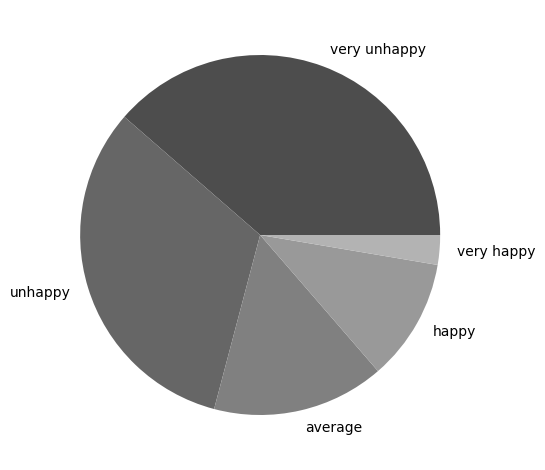

In [16]:
# pie chart (a):
grey_colors = ['0.3', '0.4', '0.5', '0.6', '0.7']
plt.pie(counts, labels=mlab, colors=grey_colors)
plt.tight_layout()
plt.show()

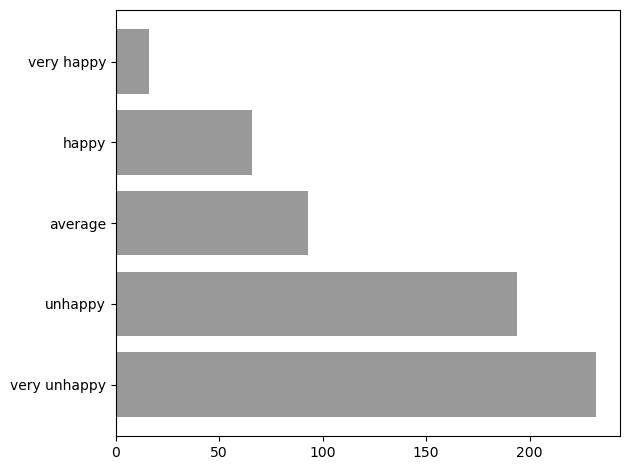

In [17]:
# horizontal bar chart (b):
y_pos = [0, 1, 2, 3, 4] 
plt.barh(y_pos, counts, color='0.6')
plt.yticks(y_pos, mlab)
plt.tight_layout()
plt.show()

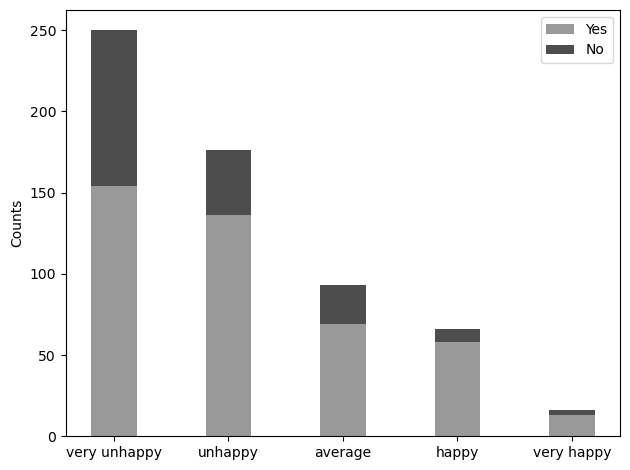

In [18]:
# stacked bar plot (c)
x_pos = [0, 1, 2, 3, 4] 
plt.bar(x_pos, counts_yes, width=0.4, color='0.6', label='Yes')
# with 'bottom=counts_yes' bars are added on top of previous ones
plt.bar(x_pos, counts_no, width=0.4, bottom=counts_yes, color='0.3', label='No')
plt.ylabel('Counts')
plt.xticks(x_pos, mlab)
plt.legend()
plt.tight_layout()
plt.show()

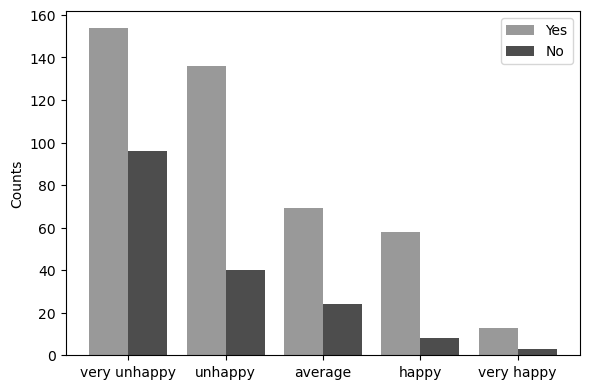

In [19]:
# grouped bar plot (d)
# add left bars first and move bars to the left:
plt.figure(figsize=(6, 4))
x_pos_leftbar = [-0.2, 0.8, 1.8, 2.8, 3.8]
plt.bar(x_pos_leftbar, counts_yes, width=0.4, color='0.6', label='Yes')
# add right bars first and move bars to the right:
x_pos_rightbar = [0.2, 1.2, 2.2, 3.2, 4.2]
plt.bar(x_pos_rightbar, counts_no, width=0.4, color='0.3', label='No')
plt.ylabel('Counts')
plt.xticks(x_pos, mlab)
plt.legend()
plt.tight_layout()
plt.show()

## 3. 연속형 분포 데이터의 히스토그램과 기초 통계 

### Wooldridge dataset "ceosal1" 변수명
#### 12개 변수 209개 관측치
* salary: 1990 salary, thousands Dollars
* pcsalary: percent change salary, 89-90
* sales: 1990 firm sales, millions  Dollars
* roe: return on equity, 88-90 avg
* pcroe: percent change roe, 88-90
* ros: return on firm’s stock, 88-90
* indus: =1 if industrial firm
* finance: =1 if financial firm
* consprod: =1 if consumer product firm
* utility: =1 if transport. or utilties
* lsalary: natural log of salary
* lsales: natural log of sales


In [20]:
import wooldridge as woo
import numpy as np

ceosal1 = woo.dataWoo('ceosal1')

# 단순 기술통계량 구하기
ceosal1.describe()
ceosal1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
salary,209.0,1281.119617,1372.345308,223.000000,736.000000,1039.000000,1407.000000,14822.000000
pcsalary,209.0,13.282297,32.633921,-61.000000,-1.000000,9.000000,20.000000,212.000000
sales,209.0,6923.793282,10633.271088,175.199997,2210.300049,3705.199951,7177.000000,97649.898438
roe,209.0,17.184211,8.518509,0.500000,12.400000,15.500000,20.000000,56.299999
pcroe,209.0,10.800478,97.219399,-98.900002,-21.200001,-3.000000,19.500000,977.000000
ros,209.0,61.803828,68.177052,-58.000000,21.000000,52.000000,81.000000,418.000000
indus,209.0,0.320574,0.467818,0.000000,0.000000,0.000000,1.000000,1.000000
finance,209.0,0.220096,0.415306,0.000000,0.000000,0.000000,0.000000,1.000000
consprod,209.0,0.287081,0.453486,0.000000,0.000000,0.000000,1.000000,1.000000
utility,209.0,0.172249,0.378503,0.000000,0.000000,0.000000,0.000000,1.000000


In [21]:
roe = ceosal1['roe']
salary = ceosal1['salary']
consprod = ceosal1['consprod']

# 평균 구하기 
roe_mean = np.mean(salary)
print(f'roe_mean: {roe_mean}\n')

# 중위수 구하기
roe_med = np.median(salary)
print(f'roe_med: {roe_med}\n')

# 표준편차 구하기
roe_s = np.std(salary, ddof=1)
print(f'roe_s: {roe_s}\n')

# roe와 salary의 상관계수 구하기
roe_corr = np.corrcoef(roe, salary)
print(f'roe_corr: \n{roe_corr}\n')

roe_mean: 1281.1196172248804

roe_med: 1039.0

roe_s: 1372.3453079588883

roe_corr: 
[[1.         0.11484173]
 [0.11484173 1.        ]]



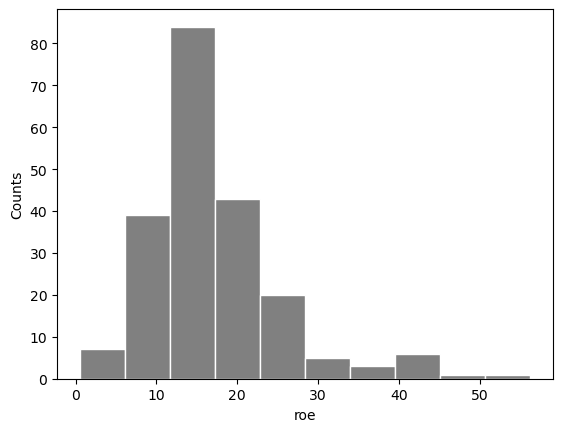

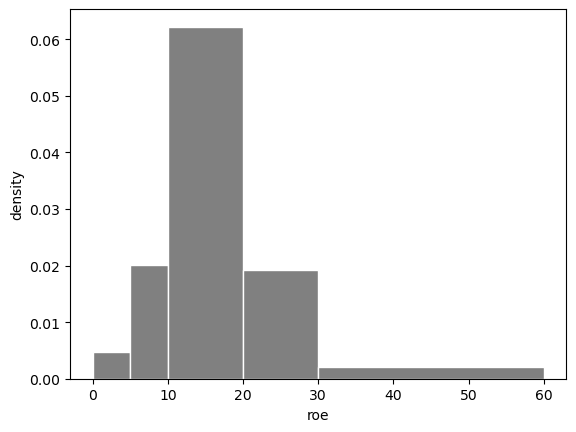

In [22]:
import wooldridge as woo
import matplotlib.pyplot as plt

ceosal1 = woo.dataWoo('ceosal1')
roe = ceosal1['roe']

# 히스토그램(histogram): 구간 자동구분
plt.hist(roe, color='grey', edgecolor='white')
plt.ylabel('Counts')
plt.xlabel('roe')
plt.show()

# 히스토그램(histogram): 구간 지정
breaks = [0, 5, 10, 20, 30, 60]
plt.hist(roe, color='grey', bins=breaks, density=True, edgecolor='white')
plt.ylabel('density')
plt.xlabel('roe')
plt.show()

In [23]:
# 커넬 밀도(kernel density)함수 구하기
kde = sm.nonparametric.KDEUnivariate(roe)
kde.fit()
display(kde.density)

array([2.11685189e-05, 2.23857985e-05, 2.44107786e-05, 2.72961248e-05,
       3.11108343e-05, 3.59407227e-05, 4.18888376e-05, 4.90757834e-05,
       5.76399338e-05, 6.77375085e-05, 7.95424830e-05, 9.32463023e-05,
       1.09057363e-04, 1.27200234e-04, 1.47914577e-04, 1.71453752e-04,
       1.98083056e-04, 2.28077608e-04, 2.61719836e-04, 2.99296576e-04,
       3.41095791e-04, 3.87402909e-04, 4.38496819e-04, 4.94645561e-04,
       5.56101755e-04, 6.23097845e-04, 6.95841222e-04, 7.74509324e-04,
       8.59244819e-04, 9.50150971e-04, 1.04728732e-03, 1.15066579e-03,
       1.26024740e-03, 1.37593963e-03, 1.49759467e-03, 1.62500859e-03,
       1.75792164e-03, 1.89601969e-03, 2.03893698e-03, 2.18626023e-03,
       2.33753403e-03, 2.49226781e-03, 2.64994400e-03, 2.81002767e-03,
       2.97197732e-03, 3.13525678e-03, 3.29934806e-03, 3.46376491e-03,
       3.62806686e-03, 3.79187339e-03, 3.95487803e-03, 4.11686193e-03,
       4.27770665e-03, 4.43740569e-03, 4.59607451e-03, 4.75395859e-03,
      

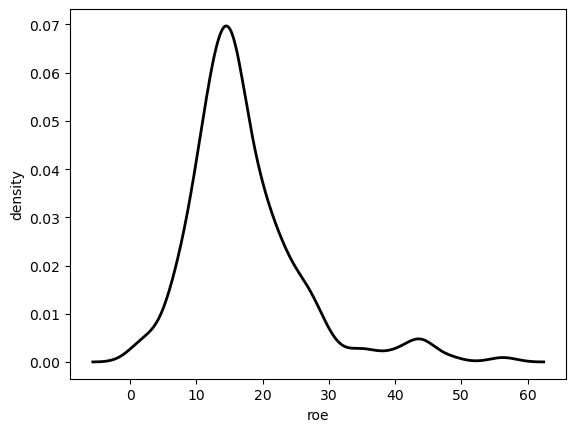

In [24]:
# 커넬밀도(kernel density)함수 그래프
plt.plot(kde.support, kde.density, color='black', linewidth=2)
plt.ylabel('density')
plt.xlabel('roe')
plt.show()

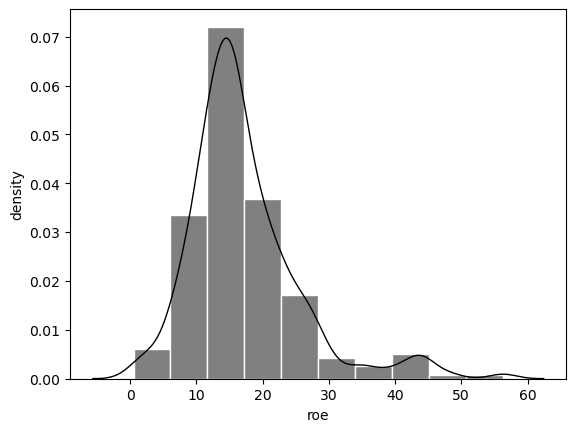

In [25]:
# 커넬밀도함수와 히스토그램 그리기
plt.hist(roe, color='grey', density=True, edgecolor='white')
plt.plot(kde.support, kde.density, color='black', linewidth=1)
plt.ylabel('density')
plt.xlabel('roe')
plt.show()

# sns.displot(b1, kde=True, bins=20)

Text(0, 0.5, 'roe')

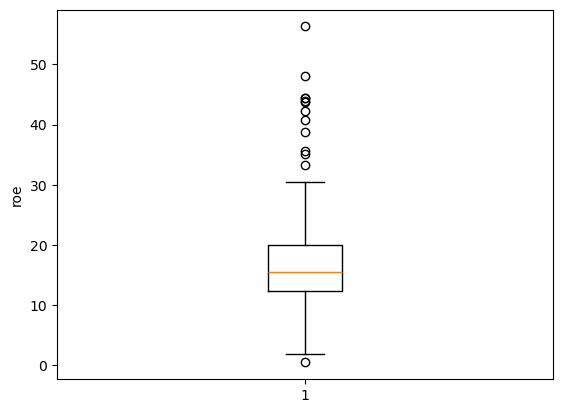

In [26]:
# 박스 그래프 
plt.boxplot(roe)
plt.ylabel('roe')


Text(0, 0.5, 'roe')

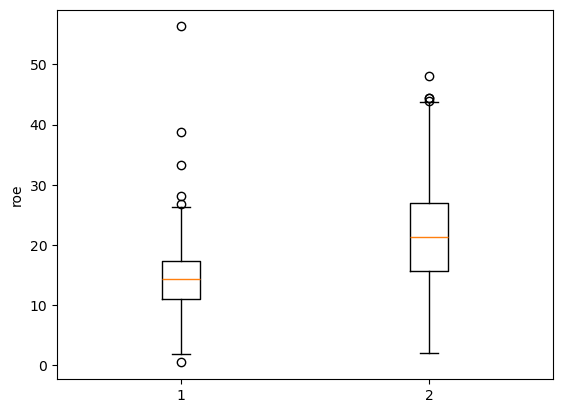

In [27]:
# conprod에 따른 roe 박스 그림
roe_0 = roe[consprod == 0]
roe_1 = roe[consprod == 1]

plt.boxplot([roe_0, roe_1])
plt.ylabel('roe')


## 4. 확률분포(Probability Distribution)

## 가. 이산 확률 분포(discrete distribution)와 확률 및 확률 질량 함수

In [28]:
import scipy.stats as stats
import math

# 이항분포의 수식을 이용한 확률계산(10개의 공 가운데 4개가 흰색일 때 2개를 뽑을 수 있는 확률)
c = math.factorial(10) / (math.factorial(2) * math.factorial(10 - 2))
p1 = c * (0.4 ** 2) * (0.6 ** 8)
print(f'p1: {p1}\n')

# 사이파이 함수(scipy function)를 이용한 이항분포 pmf계산
p2 = stats.binom.pmf(2, 10, 0.4)
print(f'p2: {p2}\n')

p1: 0.12093235199999998

p2: 0.12093235199999991



result: 
       x        fx
0    0.0  0.006047
1    1.0  0.040311
2    2.0  0.120932
3    3.0  0.214991
4    4.0  0.250823
5    5.0  0.200658
6    6.0  0.111477
7    7.0  0.042467
8    8.0  0.010617
9    9.0  0.001573
10  10.0  0.000105



Text(0, 0.5, 'f(x)')

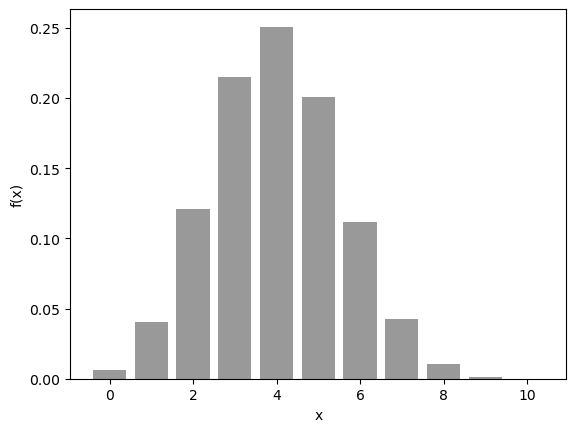

In [29]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 0~1 사이 11개 균일한 구간의 x값
x = np.linspace(0, 10, num=11)

# x값의 이항 분포의 PMF(probability mass function) 
pmf_binom = stats.binom.pmf(x, 10, 0.4)

# 데이터 프레임 만들기
result = pd.DataFrame({'x': x, 'fx': pmf_binom})
print(f'result: \n{result}\n')

# 이항분호 pmf그리기
plt.bar(x, pmf_binom, color='0.6')
plt.xlabel('x')
plt.ylabel('f(x)')


## 나. 연속 확률 분포와 확률 및 확률 밀도 함수

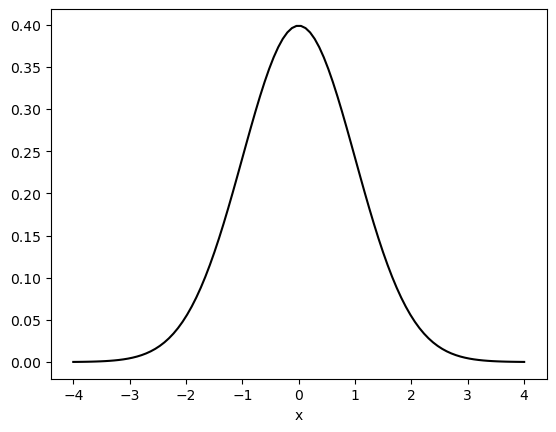

In [30]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

# 정규분포에서 x값
x = np.linspace(-4, 4, num=100)

# 정규분포의 PDF(probability density function)
norm_pdf = stats.norm.pdf(x)

# 정규분포 그래프 그리기
plt.plot(x, norm_pdf, linestyle='-', color='black')
plt.xlabel('x')
plt.show()

## 다. 누적 밀도 함수

In [31]:
import scipy.stats as stats

# 이항분포의 누적밀도 함수(CDF)
p1 = stats.binom.cdf(2, 10, 0.4)
print(f'p1: {p1}\n')

# 정규분포의 누적밀도 합수(CDF)
p2 = stats.norm.cdf(1.96) - stats.norm.cdf(-1.96)
print(f'p2: {p2}\n')

p1: 0.16728975359999992

p2: 0.950004209703559



In [32]:
import scipy.stats as stats

# 변수 X가 평균 4, 분산 9인 정규분포, 즉 X~n(4, 9)할 때 
# P(2<X<6) = q(2/3)-q(-2/3)이 됨. 그 면적을 구하려면
norm_21 = stats.norm.cdf(2 / 3) - stats.norm.cdf(-2 / 3)
print(f'norm_21: {norm_21}\n')

# 이상의 사례는 다음과 동일함
norm_22 = stats.norm.cdf(6, 4, 3) - stats.norm.cdf(2, 4, 3)
print(f'norm_22: {norm_22}\n')

# 평균 4, 표준편차 3인 정규분포에서 P(|X|>2) = 1 - P(X<=2) + P(X<=-2)의 확률은? 
norm_3 = 1 - stats.norm.cdf(2, 4, 3) + stats.norm.cdf(-2, 4, 3)
print(f'norm_3: {norm_3}\n')

norm_21: 0.4950149249061542

norm_22: 0.4950149249061542

norm_3: 0.7702575944012563



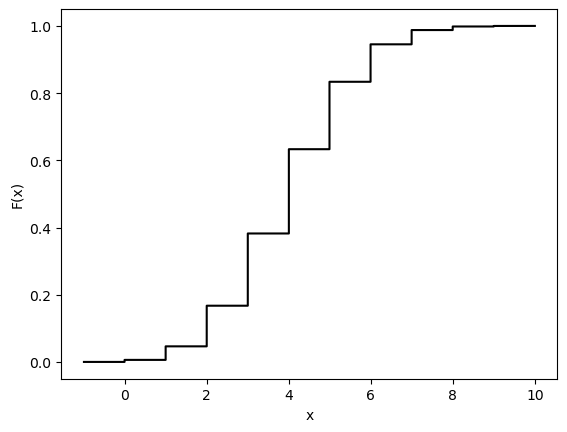

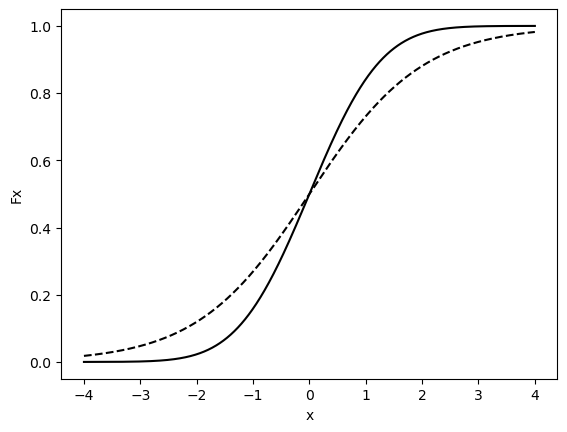

In [33]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

# 이항분포(binomial distribution)
x_binom = np.linspace(-1, 10, num=1000)

# 이항분포의 PMF 
cdf_binom = stats.binom.cdf(x_binom, 10, 0.4)

# 이항분포 CDF의 그래프
plt.step(x_binom, cdf_binom, linestyle='-', color='black')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.show()

# 정규분포(normaldistribution)의 X범위
x_norm = np.linspace(-4, 4, num=1000)

# 정규분포의 PDF 
cdf_norm = stats.norm.cdf(x_norm)

# 로지스틱 분포의 PDF 
cdf_logt = stats.logistic.cdf(x_norm)

# 정규분포, 로지스틱 분포의 CDF 그래프
plt.plot(x_norm, cdf_norm, linestyle='-', color='black')
plt.plot(x_norm, cdf_logt, linestyle='--', color='black')
plt.xlabel('x')
plt.ylabel('Fx')
plt.show()


## 라. 분위수 함수

In [34]:
# 분위수 함수(quantile function): .ppf
import scipy.stats as stats

q_975 = stats.norm.ppf(0.975)
print(f'q_975: {q_975}\n')

q_975: 1.959963984540054



## 마. 다양한 확률 분포의 난수 만들기

In [35]:
import numpy as np
import scipy.stats as stats

ber = stats.bernoulli.rvs(0.5, size=10)
nor = stats.norm.rvs(size=10)
print(ber, nor)

"""
ber = stats.bernoulli.rvs(0.5, size=10)
ber = stats.binom.rvs(0.5, size=10)
uni = stats.uniform.rvs()
nor = stats.norm.rvs()
bet = stats.beta.rvs()
gam = stats.gamma.rvs()
ttt = stats.t.rvs()
chi = stats.chi2.rvs(50, size=10)
fff = stats.F.rvs(50, 20, size=10)
mnorr = stats.multivariate_normal.rvs()
rand =pd.DataFrame
display(rand)
print(ber)
"""

[1 0 0 0 1 0 1 0 1 0] [-1.57932241 -0.74952815  1.48507596  0.80669447 -0.33909502 -0.09378676
  1.58815325 -1.22865374  2.05323568 -0.21076016]


'\nber = stats.bernoulli.rvs(0.5, size=10)\nber = stats.binom.rvs(0.5, size=10)\nuni = stats.uniform.rvs()\nnor = stats.norm.rvs()\nbet = stats.beta.rvs()\ngam = stats.gamma.rvs()\nttt = stats.t.rvs()\nchi = stats.chi2.rvs(50, size=10)\nfff = stats.F.rvs(50, 20, size=10)\nmnorr = stats.multivariate_normal.rvs()\nrand =pd.DataFrame\ndisplay(rand)\nprint(ber)\n'

In [36]:
# 표준정규분포(standard normal) RV (size n=10:
sample1 = stats.norm.rvs(size=10)
print(f'sample1: {sample1}\n')

sample2 = stats.norm.rvs(size=10)
print(f'sample2: {sample2}\n')

# random number 만들기 위한 seed(매 실행시 동일한 결과)
np.random.seed(123456)
sample3 = stats.norm.rvs(size=10)
print(f'sample3: {sample3}\n')


sample1: [-0.24124123  0.64568589 -0.06679166  0.5834882  -1.42939582 -2.50974419
  0.23162934 -1.89828372  0.76692294 -0.77142434]

sample2: [-0.39165576 -1.47728509 -0.2132865   1.3628119   1.01666336 -0.78373417
 -0.37167855 -1.3365315   1.2440338  -0.62604527]

sample3: [ 0.4691123  -0.28286334 -1.5090585  -1.13563237  1.21211203 -0.17321465
  0.11920871 -1.04423597 -0.86184896 -2.10456922]



In [37]:
import numpy as np
import scipy.stats as stats

# 2변수 차이의 평균의 신뢰구간
SR87 = np.array([10, 1, 6, .45, 1.25, 1.3, 1.06, 3, 8.18, 1.67,
                 .98, 1, .45, 5.03, 8, 9, 18, .28, 7, 3.97])

SR88 = np.array([3, 1, 5, .5, 1.54, 1.5, .8, 2, .67, 1.17, .51,
                 .5, .61, 6.7, 4, 7, 19, .2, 5, 3.83])

# 변화
Change = SR88 - SR87

# 평균과 그 표준편차
avgCh = np.mean(Change)

n = len(Change)
sdCh = np.std(Change, ddof=1)
se = sdCh / np.sqrt(n)

c = stats.t.ppf(0.975, n - 1)

# 신뢰구간(confidence interval)
lowerCI = avgCh - c * se
upperCI = avgCh + c * se
print(f'upperCI: {upperCI}\n')
print(f'lowerCI: {lowerCI}\n')

upperCI: -0.030966309815690485

lowerCI: -2.2780336901843095



## 5. 추론
#### 3개변수, 241개 관측치 
* w: =1 if white app. got job offer
* b: =1 if black app. got job offer
* y: b - w

In [38]:
import wooldridge as woo
import numpy as np
import scipy.stats as stats

audit = woo.dataWoo('audit')
y = audit['y']

# 신뢰구간 계산
avgy = np.mean(y)
n = len(y)
sdy = np.std(y, ddof=1)
se = sdy / np.sqrt(n)
c95 = stats.norm.ppf(0.975)
c99 = stats.norm.ppf(0.995)

# 95% confidence interval:
lowerCI95 = avgy - c95 * se
upperCI95 = avgy + c95 * se
print(f'lowerCI95: {lowerCI95}\n')
print(f'upperCI95: {upperCI95}\n')

# 99% confidence interval:
lowerCI99 = avgy - c99 * se
upperCI99 = avgy + c99 * se
print(f'lowerCI99: {lowerCI99}\n')
print(f'upperCI99: {upperCI99}\n')

lowerCI95: -0.1936300609350276

upperCI95: -0.07193010504007613

lowerCI99: -0.21275050976771254

upperCI99: -0.052809656207391184



In [39]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# 자유도 = n-1:
df = 19

# 유의수준
alpha_one_tailed = np.array([0.1, 0.05, 0.025, 0.01, 0.005, .001])
alpha_two_tailed = alpha_one_tailed * 2

# 임계치 
CV = stats.t.ppf(1 - alpha_one_tailed, df)
table = pd.DataFrame({'alpha_one_tailed': alpha_one_tailed,
                      'alpha_two_tailed': alpha_two_tailed, 
                      'CV': CV})
print(f'table: \n{table}\n')

table: 
   alpha_one_tailed  alpha_two_tailed        CV
0             0.100             0.200  1.327728
1             0.050             0.100  1.729133
2             0.025             0.050  2.093024
3             0.010             0.020  2.539483
4             0.005             0.010  2.860935
5             0.001             0.002  3.579400



In [40]:
import wooldridge as woo
import numpy as np
import pandas as pd
import scipy.stats as stats

audit = woo.dataWoo('audit')
y = audit['y']

# t-통계를 이용한 평균 0의 검정(함수이용)
test_auto = stats.ttest_1samp(y, popmean=0)
t_auto = test_auto.statistic  
p_auto = test_auto.pvalue  
print(f't_auto: {t_auto}\n')
print(f'p_auto/2: {p_auto / 2}\n')

# t-통계를 이용한 평균 0의 검정(수식이용)
avgy = np.mean(y)
n = len(y)
sdy = np.std(y, ddof=1)
se = sdy / np.sqrt(n)
t_manual = avgy / se
print(f't_manual: {t_manual}\n')

# t-통계의 유의수준별 임계값(critical values)  
alpha_one_tailed = np.array([0.1, 0.05, 0.025, 0.01, 0.005, .001])
CV = stats.t.ppf(1 - alpha_one_tailed, 240)
table = pd.DataFrame({'alpha_one_tailed': alpha_one_tailed, 
                      'CV': CV})
print(f'table: \n{table}\n')

t_auto: -4.276816348963646

p_auto/2: 1.369270781112999e-05

t_manual: -4.27681634896364

table: 
   alpha_one_tailed        CV
0             0.100  1.285089
1             0.050  1.651227
2             0.025  1.969898
3             0.010  2.341985
4             0.005  2.596469
5             0.001  3.124536



In [41]:
import numpy as np
import scipy.stats as stats

SR88 = np.array([10, 1, 6, .45, 1.25, 1.3, 1.06, 3, 8.18, 1.67,
                 .98, 1, .45, 5.03, 8, 9, 18, .28, 7, 3.97])
SR87 = np.array([3, 1, 5, .5, 1.54, 1.5, .8, 2, .67, 1.17, .51,
                 .5, .61, 6.7, 4, 7, 19, .2, 5, 3.83])
Change = SR88 - SR87

# t-통계를 이용한 평균 0의 검정(함수이용)
test_auto = stats.ttest_1samp(Change, popmean=0)
t_auto = test_auto.statistic
p_auto = test_auto.pvalue
print(f't_auto: {t_auto}\n')
print(f'p_auto/2: {p_auto / 2}\n')

# t-통계를 이용한 평균 0의 검정(수식이용)
avgCh = np.mean(Change)
n = len(Change)
sdCh = np.std(Change, ddof=1)
se = sdCh / np.sqrt(n)
t_manual = avgCh / se
print(f't_manual: {t_manual}\n')

# p value
p_manual =1- stats.t.cdf(t_manual, n - 1)
print(f'p_manual: {p_manual}\n')

t_auto: 2.150711003973493

p_auto/2: 0.02229062646839212

t_manual: 2.150711003973493

p_manual: 0.022290626468392083



In [42]:
import wooldridge as woo
import numpy as np
import pandas as pd
import scipy.stats as stats

# 흑인과 백인의 고용율 차이(y) 여부 검정
audit = woo.dataWoo('audit')
y = audit['y']

# 1) t-통계 수식을 이용한 평균 0(차이없음)의 검정
avgy = np.mean(y)
n = len(y)
sdy = np.std(y, ddof=1)
se = sdy / np.sqrt(n)
t_manual = avgy / se
print(f't_manual: {t_manual}\n')

# 2) t-통계함수를 이용한 평균 0(차이없음)의 검정
test_auto = stats.ttest_1samp(y, popmean=0)
t_auto = test_auto.statistic  
p_auto = test_auto.pvalue  
print(f't_auto: {t_auto}\n')
print(f'p_auto/2: {p_auto / 2}\n')

# 3) t-통계의 유의수준별 임계값(critical values)  
alpha_one_tailed = np.array([0.05, 0.025, 0.01, 0.005])
CV = stats.t.ppf(1 - alpha_one_tailed, 240)
table = pd.DataFrame({'alpha_one_tailed': alpha_one_tailed, 
                      'CV': CV})
print(f'table: \n{table}\n')  

# 4) t-통계의 p-value 계산
p_manual = stats.t.cdf(t_manual, n-1)
print(f'p_manual: {p_manual} \n')

# 5) 신뢰구간 계산
c95 = stats.norm.ppf(0.975)
c99 = stats.norm.ppf(0.995)

# - 95% confidence interval:
lowerCI95 = avgy - c95 * se
upperCI95 = avgy + c95 * se
print(f'lowerCI95: {lowerCI95}\n')
print(f'upperCI95: {upperCI95}\n')

# - 99% confidence interval:
lowerCI99 = avgy - c99 * se
upperCI99 = avgy + c99 * se
print(f'lowerCI99: {lowerCI99}\n')
print(f'upperCI99: {upperCI99}\n')


t_manual: -4.27681634896364

t_auto: -4.276816348963646

p_auto/2: 1.369270781112999e-05

table: 
   alpha_one_tailed        CV
0             0.050  1.651227
1             0.025  1.969898
2             0.010  2.341985
3             0.005  2.596469

p_manual: 1.3692707811130349e-05 

lowerCI95: -0.1936300609350276

upperCI95: -0.07193010504007613

lowerCI99: -0.21275050976771254

upperCI99: -0.052809656207391184



## Python 보완

In [43]:
# 1.8 Advanced Python


seq = [1, 2, 3, 4, 5, 6]
for i in seq:
    if i < 4:
        print(i ** 3)
    else:
        print(i ** 2)

1
8
27
16
25
36


In [44]:
seq = [10, 20, 30, 40, 50, 60]
for i in range(len(seq)):
    if seq[i] < 40:
        print(seq[i] ** 2)
    else:
        print(seq[i] ** 1)

100
400
900
40
50
60


In [45]:
# 함수(function)의 정의
def root(x):
    if x >= 0:
        result = x ** 0.5
    else:
        result = 'Not defined'
    return result

# 함수호출하여 계산결과 보관
result1 = root(100)
print(f'result1: {result1}\n')

result2 = root(-100)
print(f'result2: {result2}\n')

result1: 10.0

result2: Not defined



In [46]:
# use the predefined class 'list' to create an object:
a = [1, 5, 2, 4, 5]

# access a local variable (to find out what kind of object we are dealing with):
dir(type(a))

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [47]:
check = type(a).__name__
print(f'check: {check}\n')

# make use of a method (how many 5 are in a?):
count_5 = a.count(5)
print(f'count_5: {count_5}\n')

# use another method (sort data in a):
a.sort()
print(f'a: {a}\n')

check: list

count_5: 2

a: [1, 2, 4, 5, 5]



In [48]:
import numpy as np

# multiply these two matrices:
a = np.array([[3, 6, 1], [2, 7, 4]])
b = np.array([[1, 8, 6], [3, 5, 8], [1, 1, 2]])

# the numpy way:
result_np = a.dot(b)
print(f'result_np: \n{result_np}\n')

# or, do it yourself by defining a class:
class myMatrices:
    def __init__(self, A, B):
        self.A = A
        self.B = B

    def mult(self):
        N = self.A.shape[0]  # number of rows in A
        K = self.B.shape[1]  # number of cols in B
        out = np.empty((N, K))  # initialize output
        for i in range(N):
            for j in range(K):
                out[i, j] = sum(self.A[i, :] * self.B[:, j])
        return out


# create an object:
test = myMatrices(a, b)

# access local variables:
print(f'test.A: \n{test.A}\n')
print(f'test.B: \n{test.B}\n')

# use object method:
result_own = test.mult()
print(f'result_own: \n{result_own}\n')

result_np: 
[[22 55 68]
 [27 55 76]]

test.A: 
[[3 6 1]
 [2 7 4]]

test.B: 
[[1 8 6]
 [3 5 8]
 [1 1 2]]

result_own: 
[[22. 55. 68.]
 [27. 55. 76.]]



In [49]:
import numpy as np

# multiply these two matrices:
a = np.array([[3, 6, 1], [2, 7, 4]])
b = np.array([[1, 8, 6], [3, 5, 8], [1, 1, 2]])


# define your own class:
class myMatrices:
    def __init__(self, A, B):
        self.A = A
        self.B = B

    def mult(self):
        N = self.A.shape[0]  # number of rows in A
        K = self.B.shape[1]  # number of cols in B
        out = np.empty((N, K))  # initialize output
        for i in range(N):
            for j in range(K):
                out[i, j] = sum(self.A[i, :] * self.B[:, j])
        return out


# define a subclass:
class myMatNew(myMatrices):
    def getTotalElem(self):
        N = self.A.shape[0]  # number of rows in A
        K = self.B.shape[1]  # number of cols in B
        return N * K


# create an object of the subclass:
test = myMatNew(a, b)

# use a method of myMatrices:
result_own = test.mult()
print(f'result_own: \n{result_own}\n')

# use a method of myMatNew:
totalElem = test.getTotalElem()
print(f'totalElem: {totalElem}\n')

result_own: 
[[22. 55. 68.]
 [27. 55. 76.]]

totalElem: 6



## 6. 몬테칼로 시뮬레이션(Monte Carlo Simulation)

[ 9.99427335 10.00303715 10.00591861 ...  9.98566644 10.01007401
  9.99570498]
10.000144411488877
0.019800643843925096
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 5.45080231e-311 1.35400396e-294 1.21245889e-278 3.91382757e-263
 4.55432412e-248 1.91044159e-233 2.88889111e-219 1.57476648e-205
 3.09448751e-192 2.19204208e-179 5.59753245e-167 5.15266531e-155
 1.70983747e-143 2.04533903e-132 8.81989393e-122 1.37103645e-111
 7.68284761e-102 1.55196892e-092 1.13013780e-083 2.96665717e-075
 2.80731344e-067 9.57639449e-060 1.17760796e-052 5.22019851e-046
 8.34182135e-040 4.80532021e-034 9.97864014e-029 7.46978274e-024
 2.01572908e-019 1.96084801e-015 6.87611742e-012 8.69221016e-009
 3.96099899e-006 6.50679055e-004 3.85315521e-002 8.22533814e-001
 6.32963400e+000 1.75586458e+001 1.75586458e+001 6.32963400e+000
 8.22533814e-001 3.85315521e-002 6.5

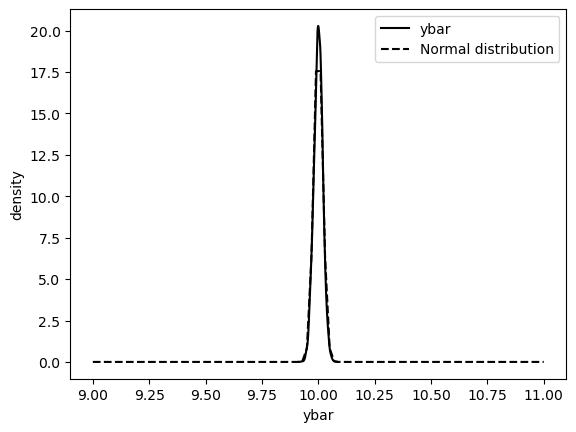

In [50]:
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

# random seed:
np.random.seed(123456)

# 표본수:
n = 10000

# 반복횟수 지정, 평균값 보관할 빈공간:
r = 10000
ybar = np.empty(r)

# 반복 10000회:
for j in range(r):
    # 반복하면서 정규분포 샘플생성후 평균값 계산:
    sample = stats.norm.rvs(10, 2, size=n)
    ybar[j] = np.mean(sample)
print(ybar) 
print(ybar.mean()) 
print(ybar.std()) 

# 커넬 밀도함수
kde = sm.nonparametric.KDEUnivariate(ybar)
kde.fit()

# 정규분포 밀도함수(normal density):
x_range = np.linspace(9, 11, num=100)
y = stats.norm.pdf(x_range, 10, np.sqrt(4/n))
print(y)

# 그래프 그리기:
plt.plot(kde.support, kde.density, color='black', label='ybar')
plt.plot(x_range, y, linestyle='--', color='black', label='Normal distribution')
plt.ylabel('density')
plt.xlabel('ybar')
plt.legend()

[1.01775635 1.00807595 1.04299456 ... 1.03901299 0.96756217 1.02347847]
0.9992490489507821
0.04451133280378836
[1.69113201e-13 5.90187795e-13 2.00782162e-12 6.65858916e-12
 2.15259091e-11 6.78364281e-11 2.08394683e-10 6.24068819e-10
 1.82179927e-09 5.18430750e-09 1.43814665e-08 3.88899855e-08
 1.02516691e-07 2.63435056e-07 6.59894857e-07 1.61138053e-06
 3.83569147e-06 8.90043868e-06 2.01326687e-05 4.43928955e-05
 9.54218400e-05 1.99942119e-04 4.08397414e-04 8.13174716e-04
 1.57836317e-03 2.98642905e-03 5.50832622e-03 9.90396948e-03
 1.73588569e-02 2.96589071e-02 4.93982261e-02 8.02028410e-02
 1.26937617e-01 1.95845284e-01 2.94549362e-01 4.31842363e-01
 6.17183903e-01 8.59856793e-01 1.16777683e+00 1.54602235e+00
 1.99523416e+00 2.51011817e+00 3.07834046e+00 3.68011444e+00
 4.28872487e+00 4.87211173e+00 5.39546005e+00 5.82454376e+00
 6.12939392e+00 6.28775113e+00 6.28775113e+00 6.12939392e+00
 5.82454376e+00 5.39546005e+00 4.87211173e+00 4.28872487e+00
 3.68011444e+00 3.07834046e+00 2.51

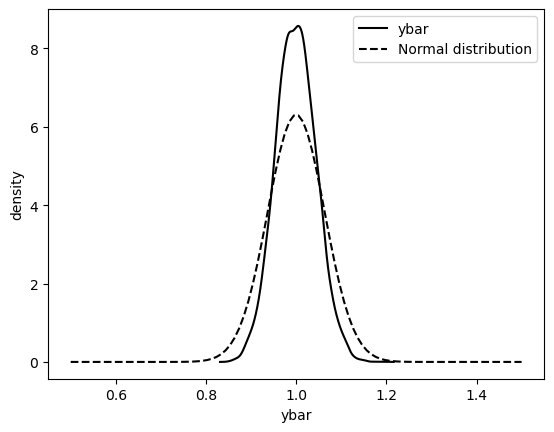

In [51]:
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

# random seed:
np.random.seed(123456)

# 표본수:
n = 1000

# 반복횟수 지정, 평균값 보관할 빈공간:
r = 10000
ybar = np.empty(r)

# 반복 10000회:
for j in range(r):
    # 반복하면서 Ch2 샘플생성후 평균값 계산:
    sample = stats.chi2.rvs(1, size=n)
    ybar[j] = np.mean(sample)
print(ybar) 
print(ybar.mean()) 
print(ybar.std()) 

# 커넬 밀도함수
kde = sm.nonparametric.KDEUnivariate(ybar)
kde.fit()

# 정규분포 밀도함수(normal density):
x_range = np.linspace(0.5, 1.5, num=100)
y = stats.norm.pdf(x_range, 1, np.sqrt(4/n))
print(y)

# 그래프 그리기:
plt.plot(kde.support, kde.density, color='black', label='ybar')
plt.plot(x_range, y, linestyle='--', color='black', label='Normal distribution')
plt.ylabel('density')
plt.xlabel('ybar')
plt.legend()


[0.96933611 0.8612887  1.20911099 ... 0.90906937 0.9581514  1.05206451]
[0.         0.         0.         0.         0.         8.86694437
 1.89622868 1.32994844 1.06853361 0.90873441 0.79752658 0.71406795
 0.64825973 0.59452762 0.54950553 0.51102212 0.47760401 0.44821042
 0.42208177 0.39864843 0.3774734  0.35821474 0.3406004  0.32441066
 0.30946576 0.29561691 0.2827397  0.27072909 0.25949568 0.24896278
 0.23906416 0.22974224 0.22094667 0.21263318 0.20476266 0.1973004
 0.19021545 0.18348009 0.17706943 0.17096104 0.1651346  0.15957168
 0.15425552 0.14917082 0.14430356 0.13964092 0.13517107 0.13088314
 0.12676708 0.12281361 0.1190141  0.11536057 0.11184556 0.10846216
 0.10520389 0.10206472 0.09903899 0.0961214  0.09330698 0.09059106
 0.08796925 0.08543742 0.08299167 0.08062831 0.07834389 0.0761351
 0.07399885 0.07193219 0.06993233 0.06799663 0.06612256 0.06430774
 0.06254991 0.06084689 0.05919663 0.05759716 0.05604663 0.05454324
 0.05308529 0.05167115 0.05029927 0.04896816 0.0476764  0.0

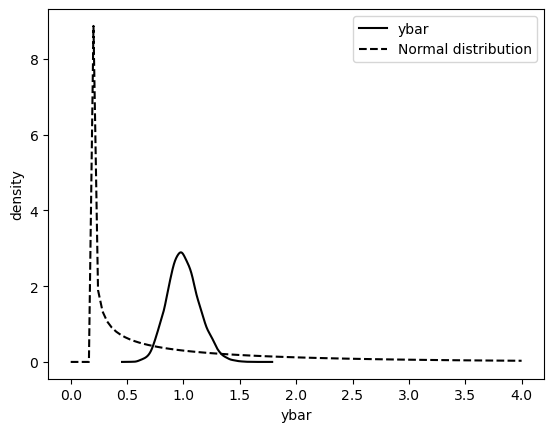

In [52]:
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

# random seed:
np.random.seed(123456)

# 표본수 지정:
n = 100

# # 반복횟수 지정, 평균값 보관할 빈공간::
r = 10000
ybar = np.empty(r)

# 반복 10000회:
for j in range(r):
    sample = stats.chi2.rvs(1, size=n)
    ybar[j] = np.mean(sample)
print(ybar) 

# 커넬 밀도함수
kde = sm.nonparametric.KDEUnivariate(ybar)
kde.fit()

# 정규분포 밀도함수(Normal density):
x_range = np.linspace(0, 4, num=100)
y = stats.chi2.pdf(x_range, 1, np.sqrt(4/n))
print(y)

# 그래프 그리기:
plt.plot(kde.support, kde.density, color='black', label='ybar')
plt.plot(x_range, y, linestyle='--', color='black', label='Normal distribution')
plt.ylabel('density')
plt.xlabel('ybar')
plt.legend()


In [1]:
import numpy as np
import scipy.stats as stats

np.random.seed(123456)

# 표본수와 반복수
r = 10000
n = 1000

# p-value 보관을 위한 빈공간
pvalue1 = np.empty(r)
pvalue2 = np.empty(r)

for j in range(r):
    sample = stats.norm.rvs(10, 2, size=n)
    sample_mean = np.mean(sample)
    sample_sd = np.std(sample, ddof=1)

    # 평균=10 테스트 
    testres1 = stats.ttest_1samp(sample, popmean=10)
    pvalue1[j] = testres1.pvalue

    # 평균=9.5 테스트 
    testres2 = stats.ttest_1samp(sample, popmean=9.5)
    pvalue2[j] = testres2.pvalue

# 검정결과(기각하는 것이 참(True):
# 평균=10을 기각
reject1 = pvalue1 <= 0.05
count1_true = np.count_nonzero(reject1) 
count1_false = r - count1_true
print(f'count1_true: {count1_true}\n')
print(f'count1_false: {count1_false}\n')

# 평균=9.5를 기각
reject2 = pvalue2 <= 0.05
count2_true = np.count_nonzero(reject2)
count2_false = r - count2_true
print(f'count2_true: {count2_true}\n')
print(f'count2_false: {count2_false}\n')  


count1_true: 517

count1_false: 9483

count2_true: 10000

count2_false: 0



Text(0, 0.5, 'Sample No.')

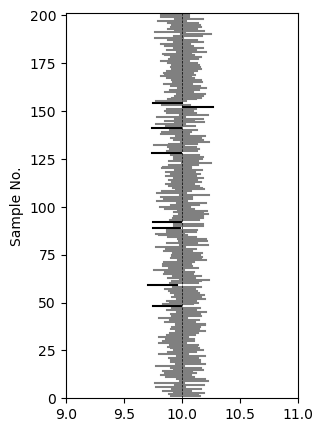

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# random seed:
np.random.seed(123456)

# 표본수와 반복수:
r = 10000
n = 1000

# 신뢰구간 보관을 위한 빈공간:
CIlower = np.empty(r)
CIupper = np.empty(r)

# r회 반복:
for j in range(r):
    sample = stats.norm.rvs(10, 2, size=n)
    sample_mean = np.mean(sample)
    sample_sd = np.std(sample, ddof=1)

    # 평균의 신뢰구간 계산
    cv = stats.t.ppf(0.975, df=n - 1)
    CIlower[j] = sample_mean - cv * sample_sd / np.sqrt(n)
    CIupper[j] = sample_mean + cv * sample_sd / np.sqrt(n)

# 평균=10 포함 신뢰구간(처음 200회 반복결과 이용)
plt.figure(figsize=(3, 5)) 
plt.ylim(0, 201)
plt.xlim(9, 11)
for j in range(1, 201):
    if 10 > CIlower[j] and 10 < CIupper[j]:
        plt.plot([CIlower[j], CIupper[j]], [j, j], linestyle='-', color='grey')
    else:
        plt.plot([CIlower[j], CIupper[j]], [j, j], linestyle='-', color='black')
plt.axvline(10, linestyle='--', color='black', linewidth=0.5)
plt.ylabel('Sample No.')


Text(0, 0.5, 'Sample No.')

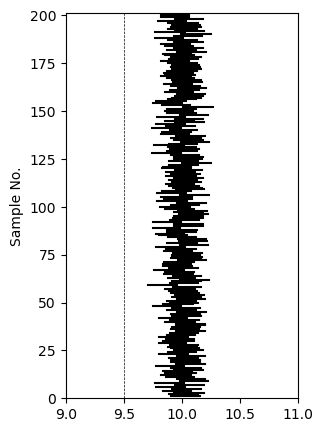

In [3]:
# 평균=9.5 포함 신뢰구간(처음 200회 반복결과 이용)
plt.figure(figsize=(3, 5))  
plt.ylim(0, 201)
plt.xlim(9, 11)

for j in range(1, 201):
    if 9.5 > CIlower[j] and 9.5 < CIupper[j]:
        plt.plot([CIlower[j], CIupper[j]], [j, j], linestyle='-', color='grey')
    else:
        plt.plot([CIlower[j], CIupper[j]], [j, j], linestyle='-', color='black')
plt.axvline(9.5, linestyle='--', color='black', linewidth=0.5)
plt.ylabel('Sample No.')


In [4]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
uni = stats.uniform.rvs(size=10000, loc = 10, scale=20)
exp = stats.expon.rvs(scale=1,loc=0,size=10000) 
bin = stats.binom.rvs(n=10,p=0.8,size=10000) 
poi = stats.poisson.rvs(mu=3, size=10000) 
ber = stats.bernoulli.rvs(size=10000,p=0.6) 
geo = stats.geom.rvs(p=0.5, size=10000)
wei = stats.weibull_min.rvs(c=1.79, size=10000)
nor = stats.norm.rvs(size=10000,loc=10,scale=20)  
snor = stats.norm.rvs(size=10000,loc=0,scale=1)
lnor = stats.lognorm.rvs(s=0.954, size=10000)
t = stats.t.rvs(df=35, size=10000)
f = stats.f.rvs(dfn=29, dfd=18, size=10000)
ch2 = stats.chi2.rvs(df=5, size=10000) 
gam = stats.gamma.rvs(a=3, size=10000) 
bet = stats.beta.rvs(a=2.3, b=0.6, size=10000) 
logi = stats.logistic.rvs(size=10000)


In [6]:
logi

array([-0.61520673,  0.3773332 ,  0.18883816, ...,  1.64630352,
        1.24029853,  1.28735475])

In [7]:
df = pd.DataFrame(np.vstack((uni, exp, bin, poi, ber, geo, wei, nor, snor, lnor, t, f, ch2, gam, bet, logi))).T

col = "uni exp bin poi ber geo wei nor snor lnor t f ch2 gam bet logi"
columns = col.split() 
df.columns = columns
display(df)

,uni,exp,bin,poi,ber,geo,wei,nor,snor,lnor,t,f,ch2,gam,bet,logi
0,11.418714,0.056383,8.0,2.0,1.0,1.0,1.012689,26.355020,0.279512,1.702162,-1.392240,1.163325,6.542250,5.155866,0.970361,-0.615207
1,19.902645,0.597308,8.0,2.0,1.0,1.0,0.645665,22.016216,-1.007896,2.241206,0.990198,2.382689,7.365726,3.267270,0.926013,0.377333
2,11.138144,0.915970,9.0,1.0,0.0,2.0,0.441022,22.075210,-0.249795,0.678859,-1.161542,0.871433,3.405882,1.773479,0.591333,0.188838
3,20.890791,2.530523,8.0,3.0,0.0,2.0,0.753362,21.294570,-2.034660,0.565295,-0.578489,0.720700,5.956924,2.531959,0.942857,-2.007292
4,20.589118,1.317046,8.0,3.0,0.0,1.0,0.533765,39.056979,0.064628,2.099505,0.395546,0.721964,5.670872,3.815540,0.216404,3.447512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,26.878949,0.072538,5.0,1.0,1.0,1.0,0.845595,38.192189,-1.215573,1.704405,-0.541261,1.926838,0.735169,3.349516,0.946799,0.268901
9996,14.510127,4.425763,8.0,5.0,0.0,4.0,0.613521,-19.297866,-1.138184,7.081638,-0.041181,1.121512,3.839536,0.429888,0.819322,-1.462326
9997,21.891322,2.930515,9.0,3.0,0.0,1.0,1.102851,11.049178,-0.389818,0.889877,-1.608004,0.944865,2.331981,1.913821,0.690565,1.646304
9998,15.547805,0.581317,6.0,6.0,0.0,1.0,1.714497,10.007389,0.498669,8.736359,0.738483,1.162724,4.868179,3.350799,0.988500,1.240299


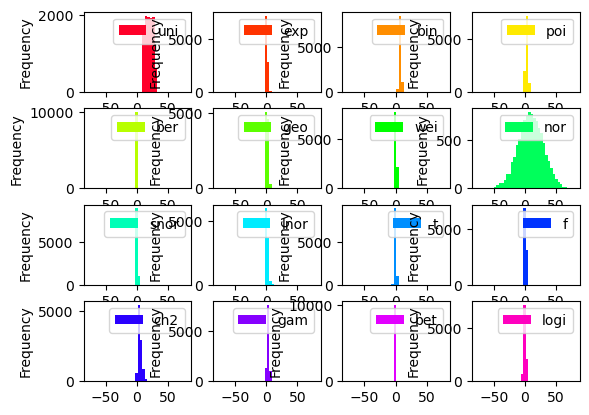

In [8]:
df.plot.hist(subplots = True, layout = (4,4), sharex = False, bins = 40, colormap="gist_rainbow");

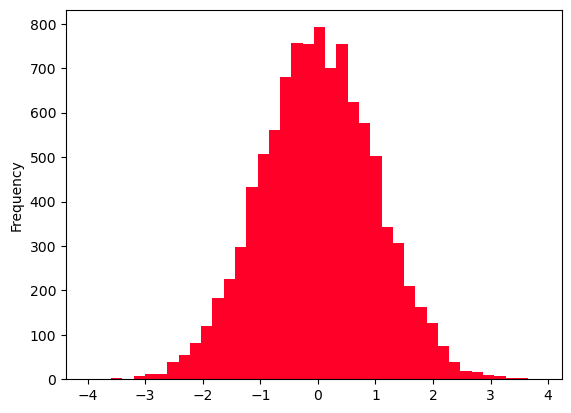

In [9]:
df['snor'].plot.hist(bins = 40, colormap="gist_rainbow");

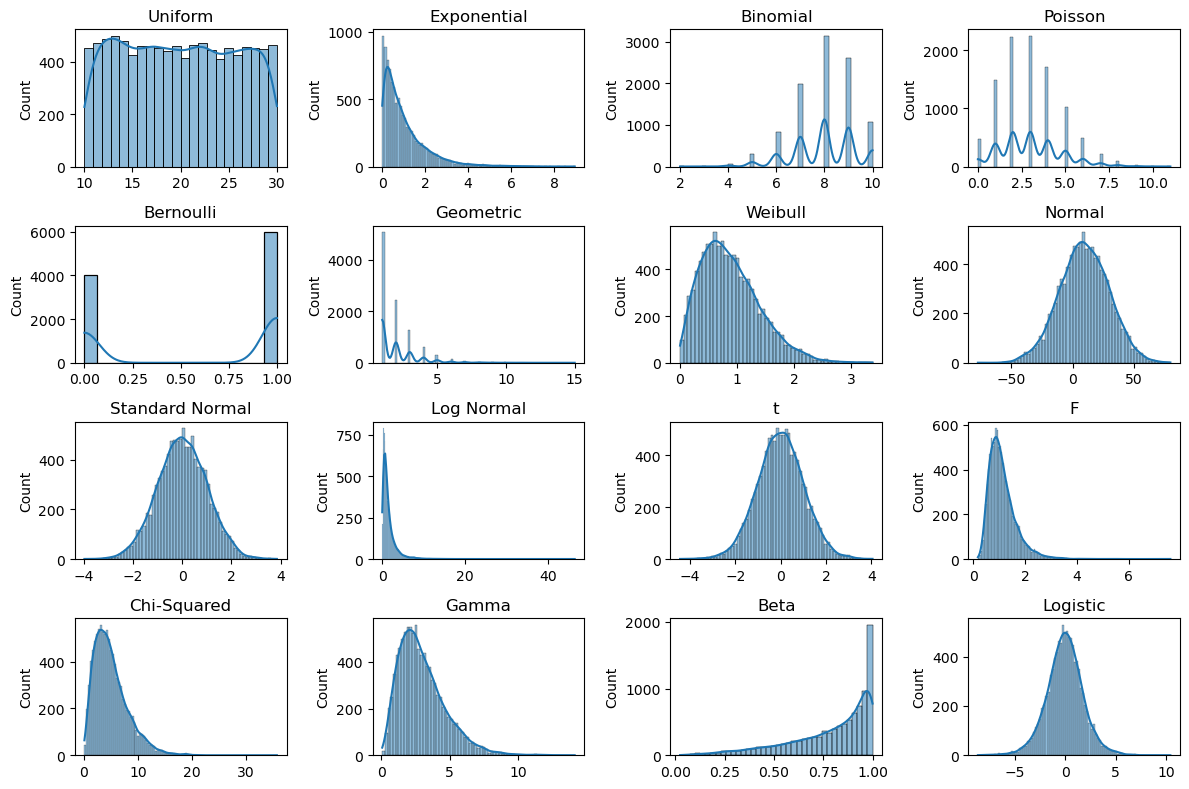

In [10]:
# subplots으로 그리기
figure, ax = plt.subplots(4, 4, figsize=(12,8))
sns.histplot(uni,  kde=True, ax=ax[0,0]).set(title='Uniform')
sns.histplot(exp,  kde=True, ax=ax[0,1]).set(title='Exponential')
sns.histplot(bin,  kde=True, ax=ax[0,2]).set(title='Binomial')
sns.histplot(poi,  kde=True, ax=ax[0,3]).set(title='Poisson') 
sns.histplot(ber,  kde=True, ax=ax[1,0]).set(title='Bernoulli')
sns.histplot(geo,  kde=True, ax=ax[1,1]).set(title='Geometric') 
sns.histplot(wei,  kde=True, ax=ax[1,2]).set(title='Weibull') 
sns.histplot(nor,  kde=True, ax=ax[1,3]).set(title='Normal') 
sns.histplot(snor, kde=True, ax=ax[2,0]).set(title='Standard Normal')
sns.histplot(lnor, kde=True, ax=ax[2,1]).set(title='Log Normal') 
sns.histplot(t,    kde=True, ax=ax[2,2]).set(title='t') 
sns.histplot(f,    kde=True, ax=ax[2,3]).set(title='F') 
sns.histplot(ch2,  kde=True, ax=ax[3,0]).set(title='Chi-Squared')
sns.histplot(gam,  kde=True, ax=ax[3,1]).set(title='Gamma') 
sns.histplot(bet,  kde=True, ax=ax[3,2]).set(title='Beta') 
sns.histplot(logi,  kde=True, ax=ax[3,3]).set(title='Logistic') 
plt.tight_layout()
plt.show()

<Axes: ylabel='Count'>

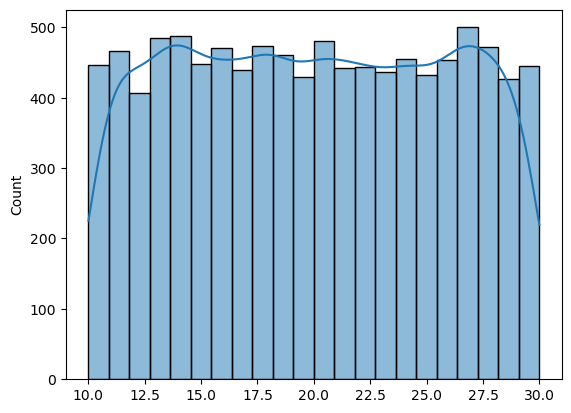

In [11]:
# Uniform distribution
rv_array = stats.uniform.rvs(size=10000, loc = 10, scale=20)

sns.histplot(rv_array, kde=True)   # plotted using seaborn

<Axes: xlabel='value_of_random_variable', ylabel='Count'>

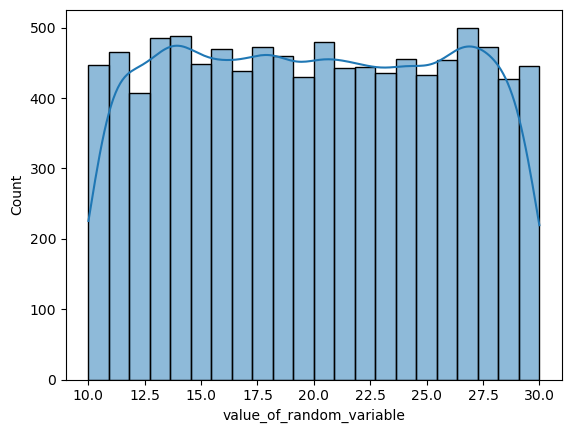

In [12]:
# plotted using seaborn
rv_df = pd.DataFrame(rv_array, columns=['value_of_random_variable'])
sns.histplot(data=rv_df, x='value_of_random_variable', kde=True)    

<Axes: ylabel='Count'>

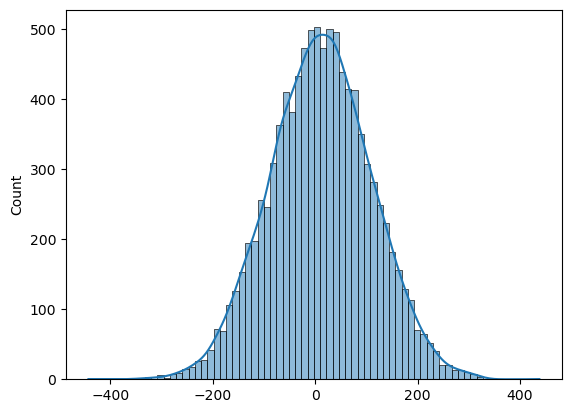

In [13]:
# Normal Distribution
rv_array = stats.norm.rvs(size=10000,loc=10,scale=100)  
sns.histplot(rv_array, kde=True) 

[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

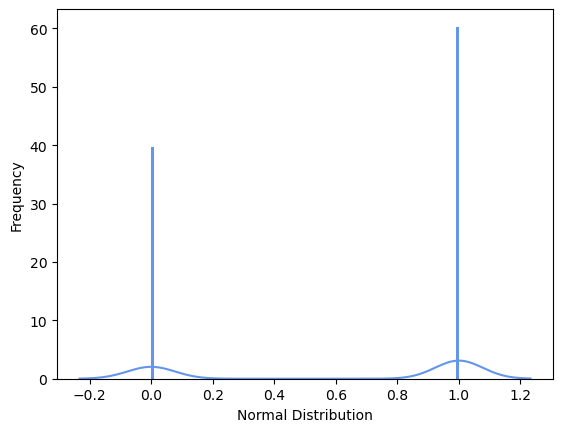

In [21]:
ax = sns.distplot(rv_array, bins=100, kde=True, color='cornflowerblue', hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

<Axes: ylabel='Count'>

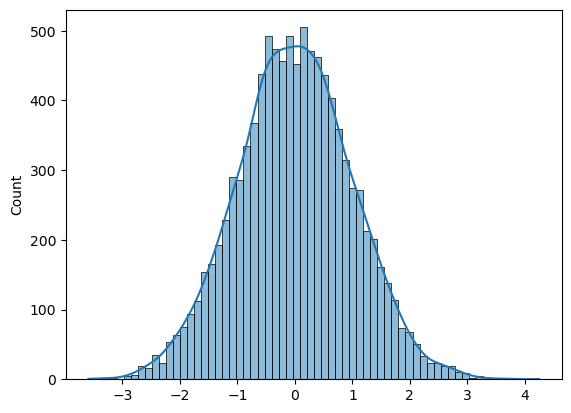

In [15]:
# Standard Normal Distribution
rv_array = stats.norm.rvs(size=10000,loc=0,scale=1) 
sns.histplot(rv_array, kde=True)

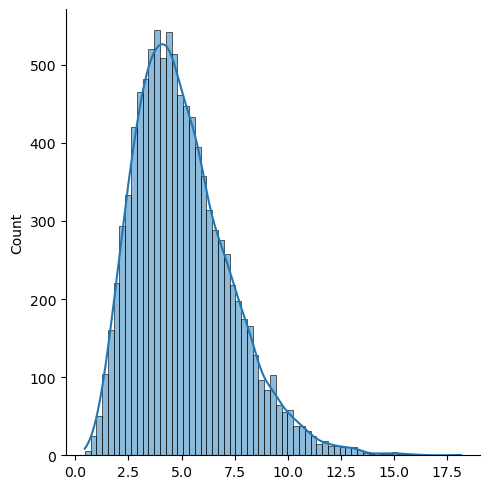

In [16]:
# Gamma distribution 
rv_array = stats.gamma.rvs(a=5, size=10000) 
sns.displot(rv_array, kde=True)

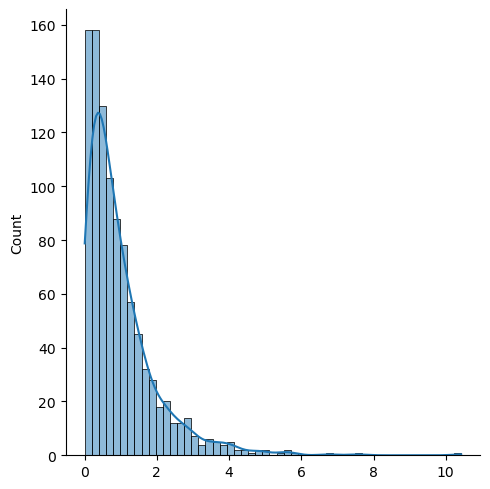

In [17]:
# Exponential distribution
rv_array = stats.expon.rvs(scale=1,loc=0,size=1000) 
sns.displot(rv_array, kde=True)

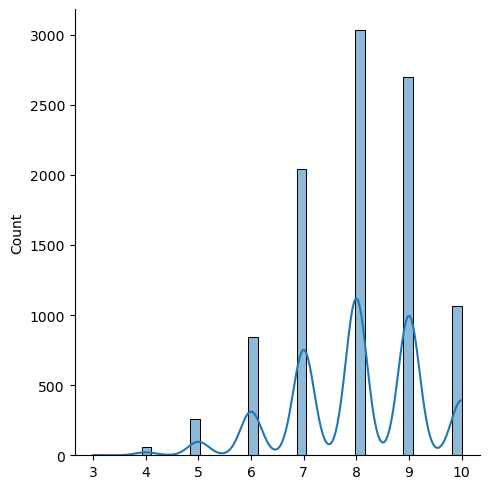

In [18]:
# Binomial Distribution
rv_array = stats.binom.rvs(n=10,p=0.8,size=10000) 
sns.displot(rv_array, kde=True)

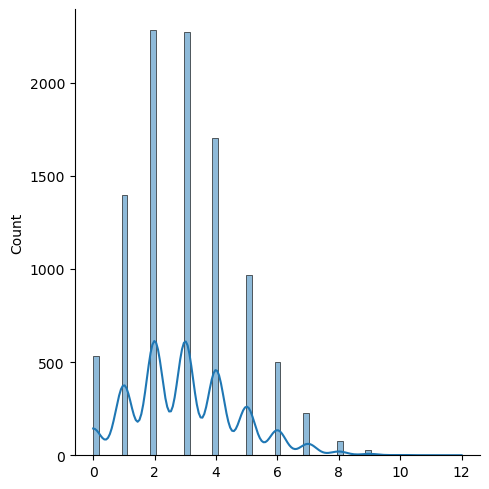

In [19]:
# Poisson Distribution
rv_array = stats.poisson.rvs(mu=3, size=10000) 
sns.displot(rv_array, kde=True)

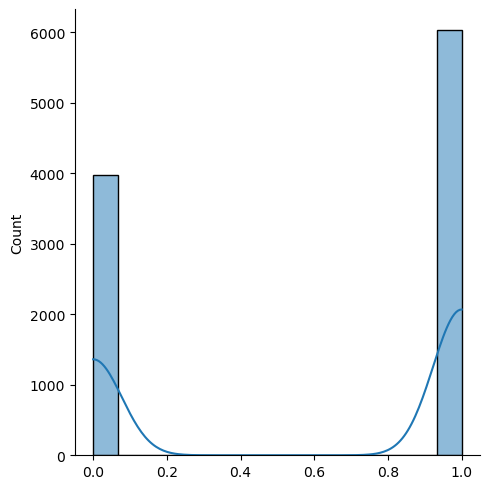

In [20]:
# Bernoulli distribution
rv_array = stats.bernoulli.rvs(size=10000,p=0.6) 
sns.displot(rv_array, kde=True)